In [1]:
import pandas as pd
import numpy as np

file = pd.read_csv(r"C:\Users\belve\Downloads\Online Payments Fraud Dataset.csv")
file.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
# Recherche de valeurs manquantes

file.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
# Recherche de lignes duplicées

file.duplicated().sum()

0

In [5]:
file.value_counts("type")

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
dtype: int64

In [6]:
file.value_counts("isFraud")

isFraud
0    6354407
1       8213
dtype: int64

<Axes: xlabel='type', ylabel='Count'>

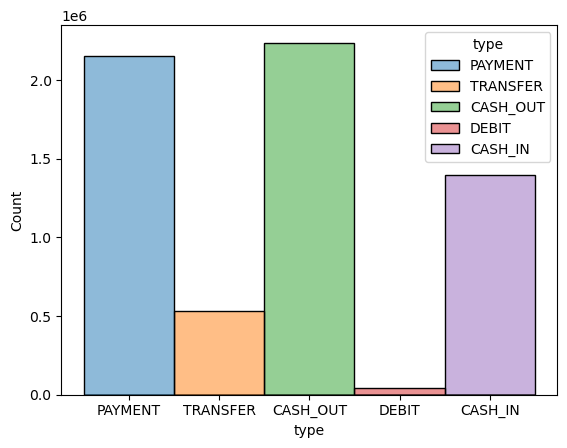

In [7]:
import seaborn as sns

sns.histplot(data=file, x="type", hue="type")

In [8]:
correlation = file.corr()
correlation

C:\Users\belve\AppData\Local\Temp\ipykernel_23656\3140170707.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = file.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [9]:
# Vérification de la présence d'outliers

<Axes: >

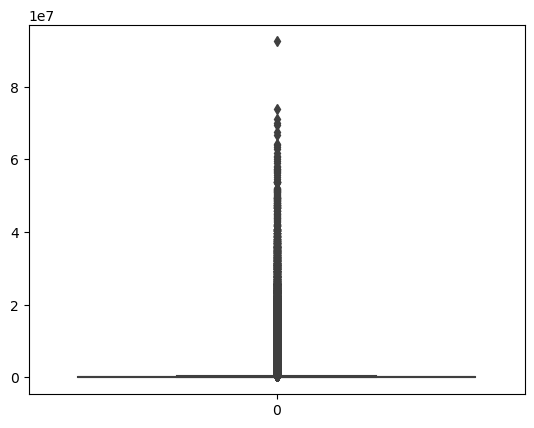

In [9]:
sns.boxplot(file["amount"])

<Axes: >

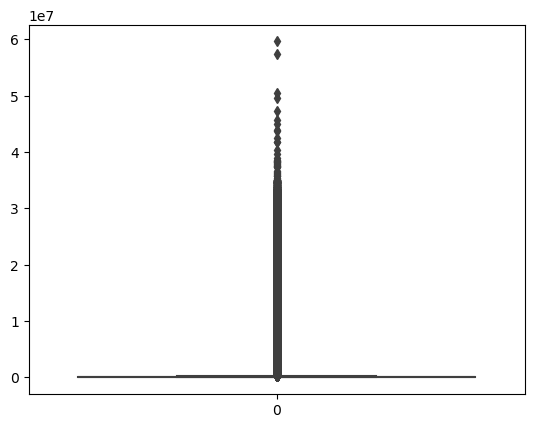

In [10]:
sns.boxplot(file["oldbalanceOrg"])

<Axes: >

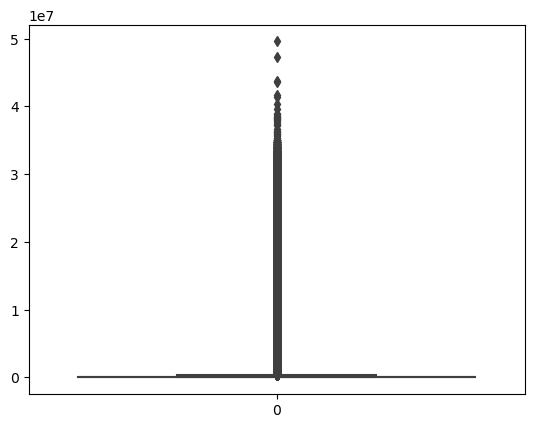

In [11]:
sns.boxplot(file["newbalanceOrig"])

<Axes: >

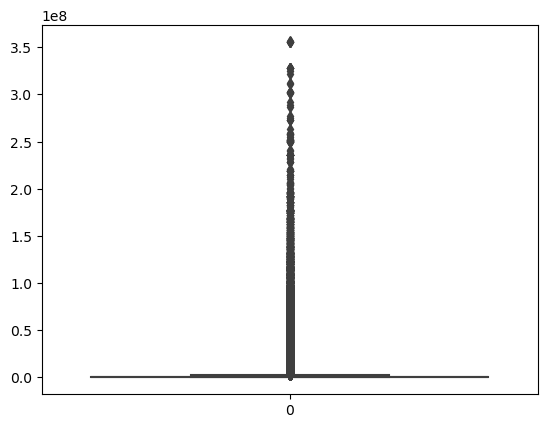

In [12]:
sns.boxplot(file["oldbalanceDest"])

<Axes: >

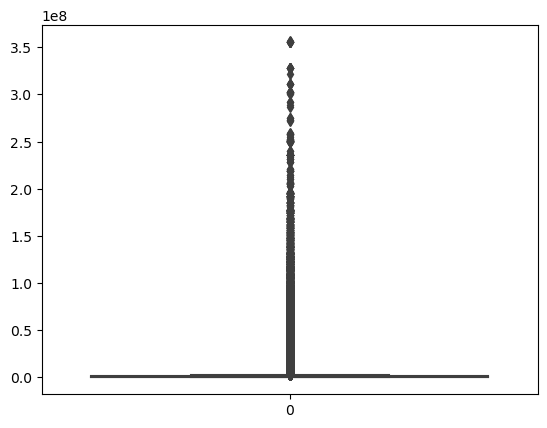

In [13]:
sns.boxplot(file["newbalanceDest"])

In [15]:
# Encodage des catégorilles

In [14]:
file["type"] = file["type"].map({
    "CASH_OUT": 1, 
    "PAYMENT": 2, 
    "CASH_IN": 3, 
    "TRANSFER": 4,
    "DEBIT": 5
})

In [15]:
file.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [16]:
# Choix du model et omportation des bibliothèques nécessaires

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

In [17]:
x = np.array(file[["type","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]])
x

array([[2.00000000e+00, 9.83964000e+03, 1.70136000e+05, 1.60296360e+05,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.86428000e+03, 2.12490000e+04, 1.93847200e+04,
        0.00000000e+00, 0.00000000e+00],
       [4.00000000e+00, 1.81000000e+02, 1.81000000e+02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 6.31140928e+06, 6.31140928e+06, 0.00000000e+00,
        6.84888400e+04, 6.37989811e+06],
       [4.00000000e+00, 8.50002520e+05, 8.50002520e+05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 8.50002520e+05, 8.50002520e+05, 0.00000000e+00,
        6.51009911e+06, 7.36010163e+06]])

In [18]:
y = np.array(file[["isFraud"]])
y

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [20]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)
print('Score = ', model.score(x_test, y_test))

Score =  0.9997288852705332


In [ ]:
# Visualiser l'arbre de décision

#from sklearn.tree import plot_tree

#plt.figure(figsize=(10, 6))
#plot_tree(model, feature_names=["type","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"], class_names=["No fraud", "Fraud"], filled=True)
#plt.show()

<Axes: >

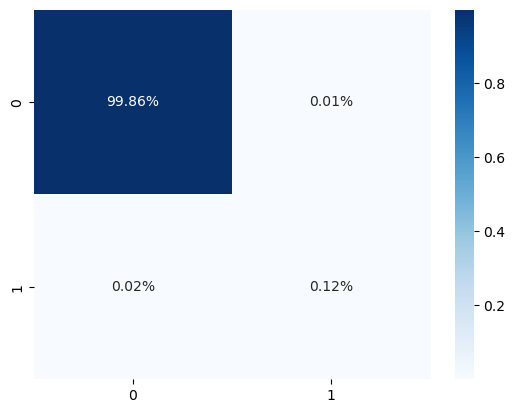

In [21]:
cm = confusion_matrix(y_test, y_predicted)

# Créez la heatmap
sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [22]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270854
           1       0.91      0.88      0.90      1670

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



In [23]:
# Executer un test

features = np.array([[4, 0, 100, 0, 0, 0]])
print(model.predict(features))

[1]


In [87]:
# Optimisation du modèle

In [24]:
tree_param = {
    'criterion': ['gini'], 
    'max_depth': [4, 5, 6],
    'max_leaf_nodes': [3, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

In [25]:
dtree_gscv = GridSearchCV(model, tree_param, cv=5)
dtree_gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 5, 6],
                         'max_leaf_nodes': [3, 4], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4]})

In [26]:
print("Meilleurs paramètres :", dtree_gscv.best_params_)

Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [27]:
best_dtree_model = dtree_gscv.best_estimator_
best_dtree_model.fit(x_train, y_train)
y_predicted = best_dtree_model.predict(x_test)

In [28]:
print('Score = ', best_dtree_model.score(x_test, y_test))

Score =  0.9989556189117061


<Axes: >

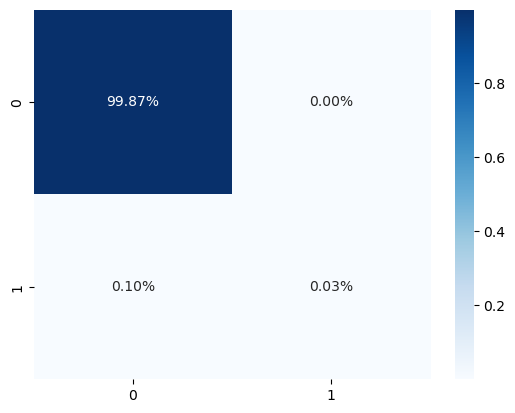

In [29]:
cm = confusion_matrix(y_test, y_predicted)

# Créez la heatmap
sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [30]:
# Save the trained model to a file using pickle
import pickle
with open('mon_model.pkl', 'wb') as file:
    pickle.dump(model, file)